# colab에서 열기

https://colab.research.google.com/github/SLCFLAB/FinTech2021/blob/main/ML_day4.ipynb

* Ref : https://datascienceschool.net/

## 1. Unconstrained Optimization (1)

### 1) Problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Local Extrema $f(x, y) = x^2+y^2$

In [ ]:
def f(x, y):
    return x ** 2 + y ** 2

### 2) Visualization

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

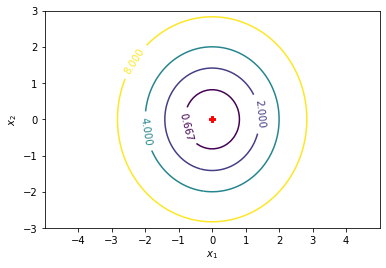

In [ ]:
plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

CS = plt.contour(X, Y, Z, levels=[2/3, 2, 4, 8])
plt.clabel(CS, fontsize=10)
plt.plot([0], [0], 'rP') # Zero

plt.show()

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=[
    go.Surface(x=X, y=Y, z=Z)
])

fig.show()
#fig.show(renderer="colab")

### 3) Solve with fmin_slspq

In [ ]:
import scipy as sp
from scipy import optimize

In [ ]:
sp.__version__

'1.5.0'

In [ ]:
def farray(x):
    return x[0]-2)** 2 + x[1]** 2 # 2x^2 + y^2

sp.optimize.fmin_slsqp(farray, np.array([1, 1]))
# 왜 초기값이 필요한가?
# Python : 수학적인 분석을 어려워함 < 사람 : f_x, f_y, D  계산
# Gradient Descent! -> (1) 초기 위치 (2) 기울기 -> 기울기의 반대방향으로 감!

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2


array([0., 0.])

## 2. Unconstrained Optimization (2)

### 1) Problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Local Extrema $f(x, y) = 4y^3+x^2-12y^2-36y+2$

In [ ]:
def f(x, y):
    return 4*(y**3) + (x**2) - 12*(y**2) - 36*y + 2

### 2) Visualization

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

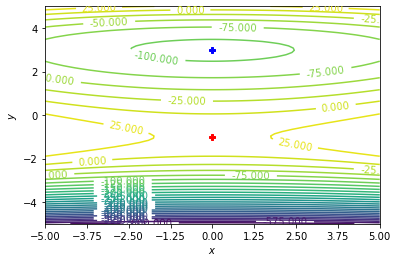

In [ ]:
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-5, 5, 9))
plt.xlabel("$x$")
plt.ylabel("$y$")

CS = plt.contour(X, Y, Z, 30)
plt.clabel(CS, fontsize=10)
plt.plot([0], [3], 'bP') # Zero
plt.plot([0], [-1], 'rP') # Zero

plt.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=[
    go.Surface(x=X, y=Y, z=Z)
])

fig.show()
#fig.show(renderer="colab")

In [ ]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=[
                    go.Surface(x=X, y=Y, z=Z),
                    go.Scatter3d(x=[0], y=[3], z=[f(0, 3)],
                                marker=dict(
                                    size=3,
                                    color='black',
                                    opacity=0.8
                                )),
                    go.Scatter3d(x=[0], y=[-1], z=[f(0, -1)],
                                marker=dict(
                                    size=3,
                                    color='black',
                                    opacity=0.8
                                ))
                ])

fig.show()
#fig.show(renderer="colab")

## 1. Equality Constrained Optimization

### 1) Problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Minimize $f(x_1, x_2) = 2x_1^2+x_2^2$  
Subject to : $x_1+x_2=1$

In [ ]:
def f(x1, x2) :
    return 2*(x1**2) + x2**2

def g(x1) :
    return 1 - x1

### 2) Visualization

In [ ]:
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

# constraint function g(x) = x1 + x2 - 1 = 0
x2_g = g(x1)

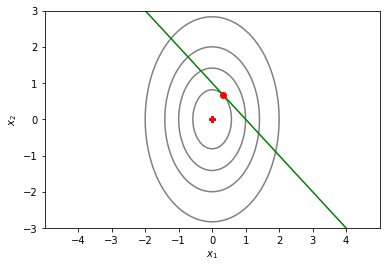

In [ ]:
plt.contour(X1, X2, Y, colors="gray", levels=[2/3, 2, 4, 8])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP') # Zero
plt.plot([1/3], [2/3], 'ro') # Answer

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### 3) Solve with fmin_slspq

In [ ]:
import scipy as sp
from scipy import optimize

In [ ]:
sp.__version__

'1.5.2'

In [ ]:
def farray(x):
    return 2*x[0]**2 + x[1]**2

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(farray, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6666666666666667
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4


array([0.33333333, 0.66666667])

## 2. Inequality Constrained Optimization

### 1) Problem

Minimize $f(x_1, x_2) = (x_1-2)^2+2(x_2-1)^2$  
Subject to : $x_1+4x_2 \leq 3, x_1 \geq x_2$

In [ ]:
def f(x1, x2):
    return (x1 - 2) ** 2 + 2*(x2 - 1) ** 2

def g1(x1):
    return (3-x1)/4

def g2(x1):
    return x1 

### 2) Visualization

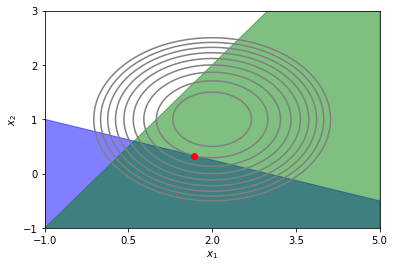

In [ ]:
x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

x2_g1 = g1(x1)
x2_g2 = g2(x1)

plt.contour(X1, X2, Y, colors="gray",
            levels=np.arange(0, 5, 0.5))

plt.plot([5/3], [1/3], 'ro') # Answer

ax = plt.gca()
ax.fill_between(x1, x2_g1, -100, color='b', alpha=0.5)
ax.fill_between(x1, x2_g2, -100, color='g', alpha=0.5)

plt.xlim(-1, 5)
plt.ylim(-1, 3)
plt.xticks(np.linspace(-1, 5, 5))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### 3) Solve with fmin_slspq

In [ ]:
def farray(x):
    return (x[0] - 2) ** 2 + 2*(x[1] - 1) ** 2

def ieq_constraint1(x):
    return 3-(x[0]+4*x[1]) # >=0

def ieq_constraint2(x):
    return x[0]-x[1] # >=0

sp.optimize.fmin_slsqp(farray, np.array([0, 0]), ieqcons=[ieq_constraint1, ieq_constraint2])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000000053
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4


array([1.66666666, 0.33333333])

## 0204 과제 -> 0208 중간고사(13:30) 전까지 제출
### 박진성 조교 (jinseong@snu.ac.kr) 메일로 제출

hw1: Karush-Kuhn-Tucker (KKT) conditions Example (기계학습1. Optimization - 16페이지) 

*단, f(x,y)=-4/9가 아닌 -1입니다.*

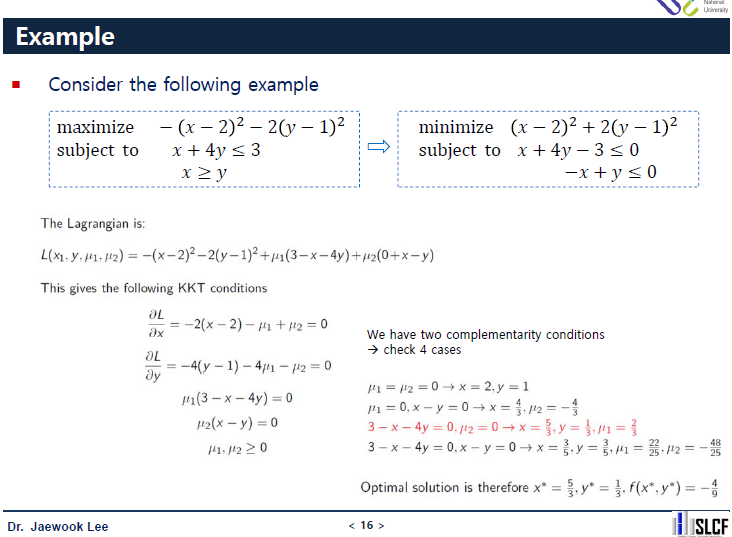

hw2: Quadratic Optimization for SVM (기계학습 2. SVM - 17,18,19 페이지)
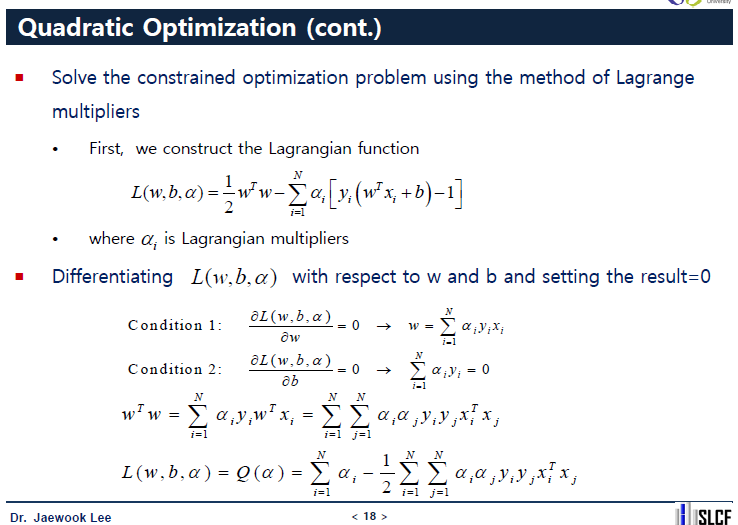